# Day 1 — Linear Algebra Basics (Vectors & Matrices)

**Date:** 2025-09-05

**Goals (today):**
- Build intuition for vectors: dot product, norm, angle, projection
- Practice matrix multiplication & identity/inverse/determinant
- Visualize 2D vectors and a simple linear transform

**Deliverables:** two plots saved to `figures/`, working code cells, and a 5–7 sentence reflection at the end.

In [1]:
# Cell 1 — Imports & setup
import numpy as np
import matplotlib.pyplot as plt

np.set_printoptions(suppress=True, precision=4)

print("NumPy:", np.__version__)
print("Matplotlib:", plt.matplotlib.__version__)

Matplotlib is building the font cache; this may take a moment.


NumPy: 2.3.2
Matplotlib: 3.10.6


In [45]:
# Cell 2 — Create basic 2D vectors
a = np.array([3, 4])       # Vector a
b = np.array([1, -2])      # Vector b

print("a:", a, "shape:", a.shape)
print("b:", b, "shape:", b.shape)

# Tip: If you see shape errors later, print a.shape and b.shape again.

a: [3 4] shape: (2,)
b: [ 1 -2] shape: (2,)


In [46]:
# Cell 3 — Dot product, norms, angle between vectors
dot_ab = a @ b                         # dot product
norm_a = np.linalg.norm(a)             # ||a||
norm_b = np.linalg.norm(b)             # ||b||
cos_theta = dot_ab / (norm_a * norm_b) # may be slightly >1/<-1 from float roundoff
theta_rad = np.arccos(np.clip(cos_theta, -1, 1))
theta_deg = np.degrees(theta_rad)

print(f"dot(a,b) = {dot_ab}")          # expect 3*1 + 4*(-2) = -5
print(f"||a|| = {norm_a:.4f}")         # expect 5.0
print(f"||b|| = {norm_b:.4f}")         # sqrt(1^2 + (-2)^2) = sqrt(5)
print(f"angle(a,b) = {theta_deg:.2f}°")# obtuse if dot < 0

dot(a,b) = -5
||a|| = 5.0000
||b|| = 2.2361
angle(a,b) = 116.57°


In [49]:
# Cell 4 — Projection of a onto b and orthogonality check
# proj_b(a) = (a·b / b·b) * b
proj_a_on_b = (dot_ab / (b @ b)) * b
residual = a - proj_a_on_b

print("projection of a onto b:", proj_a_on_b)
print("residual (a - proj):", residual)
print("residual orthogonal to b? dot =", residual @ b)  # ~0 if orthogonal

projection of a onto b: [-1.  2.]
residual (a - proj): [4. 2.]
residual orthogonal to b? dot = 0.0


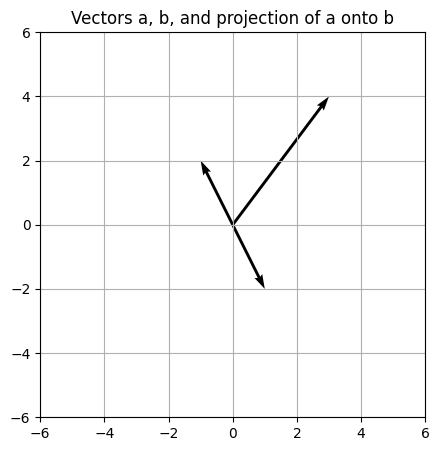

In [47]:
# Cell 5 — Visualize vectors and the projection with a 2D quiver plot
fig, ax = plt.subplots(figsize=(5, 5))
origin = np.array([[0, 0, 0], [0, 0, 0]])  # three origins (x0, y0) for 3 arrows

# Plot a, b, and projection of a onto b (defaults use Matplotlib's styling)
ax.quiver(*origin, [a[0], b[0], proj_a_on_b[0]], [a[1], b[1], proj_a_on_b[1]],
          angles='xy', scale_units='xy', scale=1)

# Axes & layout
ax.set_xlim(-6, 6)
ax.set_ylim(-6, 6)
ax.set_aspect('equal', 'box')
ax.grid(True)
ax.set_title("Vectors a, b, and projection of a onto b")
plt.show()

# Save the figure to the repo (relative to this notebook)
fig.savefig("../figures/day1_vectors.png", dpi=150, bbox_inches="tight")


In [35]:
# Cell 6 — Matrix × vector and matrix × matrix
A = np.array([[2, 0],
              [1, 3]])      # 2x2 matrix
x = np.array([3, 4])        # vector

Ax = A @ x                  # (2x2) @ (2,) -> (2,)
print("A:\n", A)
print("x:", x)
print("A @ x:", Ax)         # expect [2*3 + 0*4, 1*3 + 3*4] = [6, 15]

A:
 [[2 0]
 [1 3]]
x: [3 4]
A @ x: [ 6 15]


In [36]:
# Cell 7 — Identity, determinant, and inverse
I = np.eye(2)
detA = np.linalg.det(A)
A_inv = np.linalg.inv(A)

print("I:\n", I)
print("det(A):", detA)
print("A_inv:\n", A_inv)
print("A @ A_inv ≈ I?\n", A @ A_inv)

# Sanity assertion — this should pass for invertible A
assert np.allclose(A @ A_inv, I), "Inverse check failed"

I:
 [[1. 0.]
 [0. 1.]]
det(A): 6.0
A_inv:
 [[ 0.5     0.    ]
 [-0.1667  0.3333]]
A @ A_inv ≈ I?
 [[1. 0.]
 [0. 1.]]


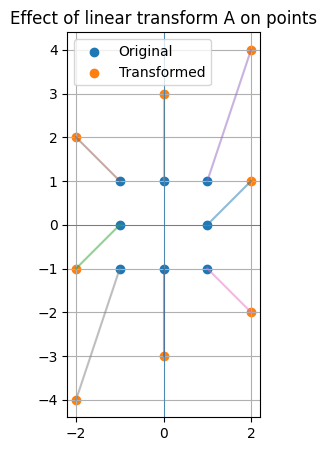

In [43]:
# Cell 8 — Visualize a simple linear transform
# Apply A to a small set of 2D points to see how space is skewed/stretched.
grid = np.array([[ 1,  0],
                 [ 0,  1],
                 [-1,  0],
                 [ 0, -1],
                 [ 1,  1],
                 [-1,  1],
                 [ 1, -1],
                 [-1, -1]])
grid_transformed = (A @ grid.T).T

fig, ax = plt.subplots(figsize=(5, 5))
ax.scatter(grid[:, 0], grid[:, 1], label="Original")
ax.scatter(grid_transformed[:, 0], grid_transformed[:, 1], label="Transformed")
for p, q in zip(grid, grid_transformed):
    ax.plot([p[0], q[0]], [p[1], q[1]], alpha=0.5)

ax.axhline(0, lw=0.5); ax.axvline(0, lw=0.5)
ax.set_aspect('equal', 'box'); ax.grid(True)
ax.legend()
ax.set_title("Effect of linear transform A on points")
plt.show()

fig.savefig("../figures/day1_transform.png", dpi=150, bbox_inches="tight")

## Self-Quiz (answer briefly in this cell or the one below)
1. When is the dot product zero, and what does that imply about two vectors?
2. How do you compute the projection of `a` onto `b`?
3. What does a negative dot product say about the angle between vectors?
4. What must be true for a square matrix to have an inverse?

## Reflection (5–7 sentences)
- What “clicked” today about dot products or projections?
- Any numerical pitfalls you noticed (e.g., rounding, `arccos` domain)?
- 1–2 questions you want to revisit tomorrow.